In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

In [234]:
color_dict = {}
color_dict['M_SHH'] = ['w',"#C2D9F7", "#98C1F0", "#4782DD", "#1D52A1"]
color_dict['M_RA'] = ['w', "#aadce0","#72bcd5", "#528fad", "#376795"]
color_dict['M_BMP4'] = ['w', "#ffe6b7", "#ffd353","#ffb242"]
color_dict['M_XAV'] = ['w', "#f9b4c9","#d8527c","#9a133d"]
color_dict['M_CHIR'] = ['w',"#dec5da", "#b695bc", "#90719f", "#574571"]
color_dict['M_FGF8'] = ['w','#ffbbff','#ee7ae9','#b452cd','#8b008b']

color_dict['RA_4'] = "#376795"
color_dict['RA_3'] =  "#528fad"
color_dict['RA_2'] = "#72bcd5"
color_dict['RA_1'] = "#aadce0"

color_dict['BMP4_3'] = "#ffb242"
color_dict['BMP4_2'] = "#ffd353"
color_dict['BMP4_1'] = "#ffe6b7"

color_dict['XAV_3'] = "#9a133d"
color_dict['XAV_2'] = "#d8527c"
color_dict['XAV_1'] = "#f9b4c9"

color_dict['FGF8_1'] ='#ffbbff'
color_dict['FGF8_2'] ='#ee7ae9'
color_dict['FGF8_3'] ='#b452cd'
color_dict['FGF8_4'] ='#8b008b'

color_dict['CHIR_1'] = "#dec5da"
color_dict['CHIR_2'] = "#b695bc"
color_dict['CHIR_3'] = "#90719f"
color_dict['CHIR_4'] = "#574571"

color_dict['SHH_1'] = "#C2D9F7"
color_dict['SHH_2'] = "#98C1F0"
color_dict['SHH_3'] = "#4782DD"
color_dict['SHH_4'] = "#1D52A1"

color_dict['RA_4_CHIR'] = "#3c7c3d"
color_dict['RA_3_CHIR'] = "#669d62"
color_dict['RA_2_CHIR'] = "#9cc184"
color_dict['RA_1_CHIR'] = "#c2d6a4"

color_dict['FGF8_1_CHIR'] = "#cccccc"
color_dict['FGF8_2_CHIR'] = "#999999"
color_dict['FGF8_3_CHIR'] = "#666666"
color_dict['FGF8_4_CHIR'] = "#333333"

color_dict['ctrl'] = 'darkblue'
#col_FGF8 <- c("plum1", "orchid2", "mediumorchid3", "magenta4")
#col_RA_CHIR <- c("#3c7c3d", "#669d62", "#9cc184", "#c2d6a4")
#col_FGF8_CHIR <- c("gray80", "gray60", "gray40", "gray20")

#col_DV <- c("#ffb242", "#ffd353", "#ffe6b7", "gray90", "#C2D9F7", "#98C1F0", "#4782DD", "#1D52A1")
#col_AP <- c(col_XAV, "gray90", col_CHIR, col_RA, col_FGF8, col_RA_CHIR, col_FGF8_CHIR)

In [7]:
sample = 'iGlut_post'

In [150]:
i = 0
for sample in ['iGlut_post','iGABA_post','iGABA_pre','iGlut_pre']:
    dist_summary = pd.read_csv(sample+"_euclid_distances_PCA_50_summary.tsv",sep="\t")

    meta = pd.read_csv("scanpy/"+sample+"_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
    meta['M_CycA'] = meta['CycA']
    meta.drop('CycA',axis=1,inplace=True)
    meta.head()

    meta['condition'] = meta['AP_axis'] + "_" + meta['DV_axis']
    meta['condition_BM'] = meta['AP_axis'] + "_" + meta['DV_axis']+'_'+meta['Basal_media']

    dist_summary.index = dist_summary['cell']
    meta['mdist'] = 1
    meta.loc[dist_summary.index,'mdist'] = dist_summary.loc[dist_summary.index,'mdist']

    meta['mcorr'] = 1 - meta['mdist']
    
    meta.index = [sample+"_"+x for x in meta.index]
    
    if i == 0:
        meta_all = meta.copy()
        i+=1
    else:
        meta_all = pd.concat([meta,meta_all])

In [151]:
meta_all['sample'] = [re.sub("_post_p.*","_post",x) for x in meta_all['sample']]

/tmp/ipykernel_206458/2563326309.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()
/tmp/ipykernel_206458/2563326309.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()


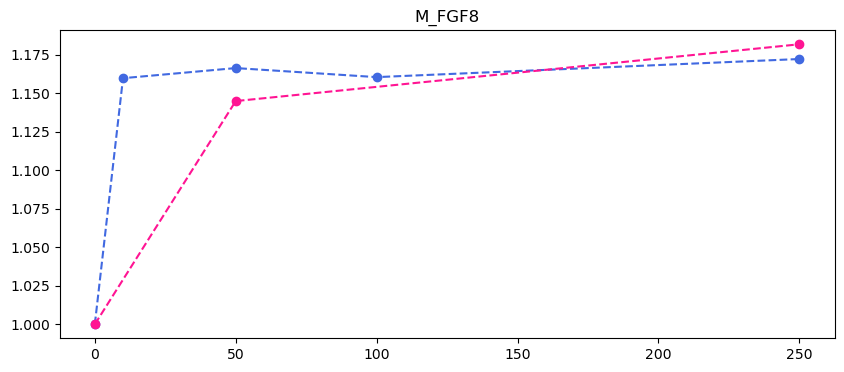

/tmp/ipykernel_206458/2563326309.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()
/tmp/ipykernel_206458/2563326309.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()


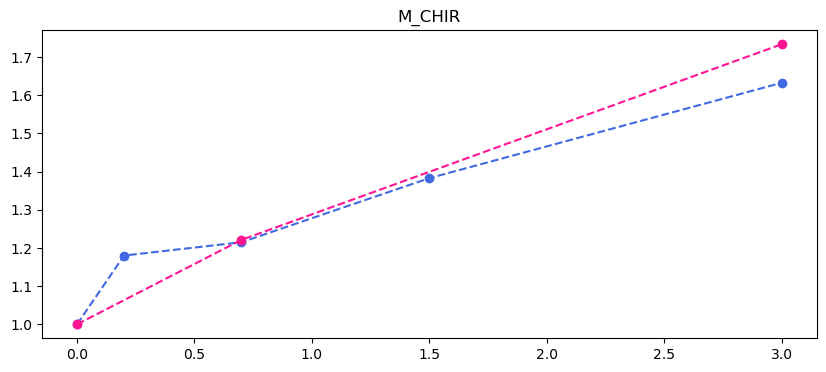

/tmp/ipykernel_206458/2563326309.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()
/tmp/ipykernel_206458/2563326309.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()


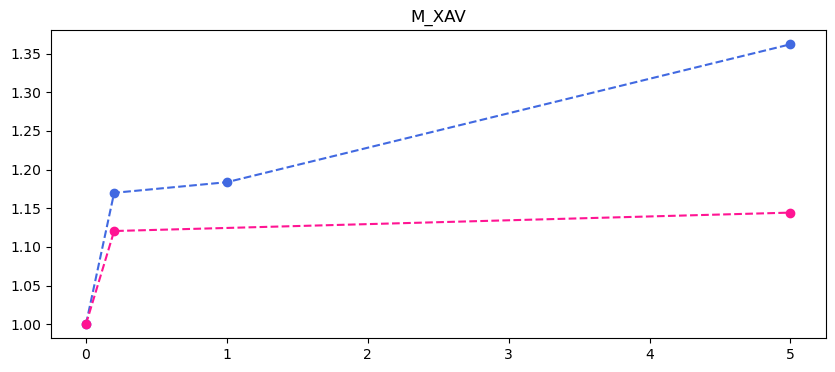

/tmp/ipykernel_206458/2563326309.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()
/tmp/ipykernel_206458/2563326309.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()


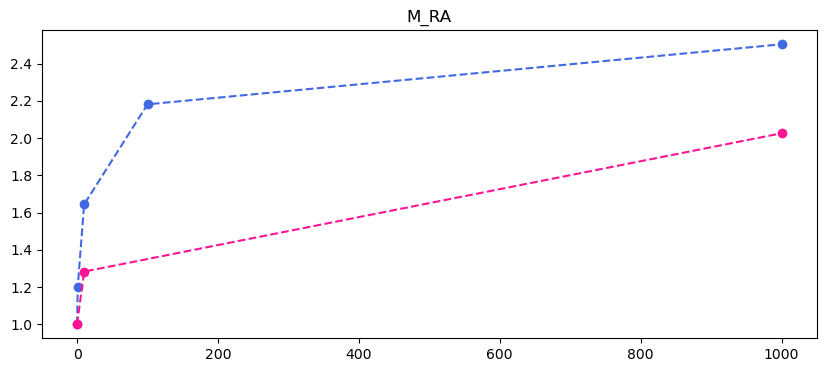

/tmp/ipykernel_206458/2563326309.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()
/tmp/ipykernel_206458/2563326309.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()


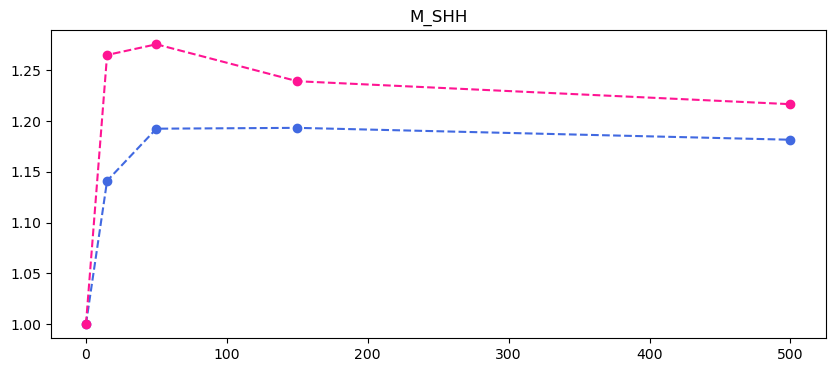

/tmp/ipykernel_206458/2563326309.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()
/tmp/ipykernel_206458/2563326309.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()


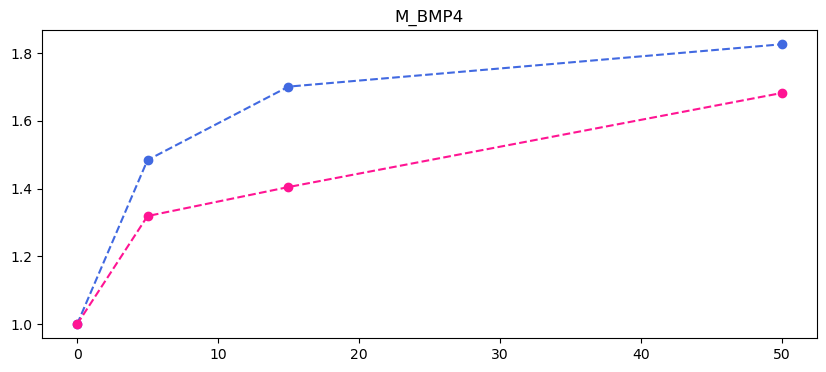

In [237]:
morphogens = ['FGF8','CHIR','XAV','RA','SHH','BMP4']
for morph in morphogens:
    meta_all_plot = meta_all.loc[meta_all['sample'].isin(['iGlut_post','iGABA_post'])].copy()

    morph_conditions = [x for x in list(set(meta_all_plot['condition'])) if morph in x]
    morph_conditions = [x for x in morph_conditions if 'ctrl' in x]
    
    other_morphs = [x for x in morphogens if x!=morph]
    for o_morph in other_morphs:
        morph_conditions = [x for x in morph_conditions if not o_morph in x]

    morph_conditions.append('ctrl_ctrl')

    meta_all_plot = meta_all_plot.loc[meta_all_plot['condition'].isin(morph_conditions)]
    morph = 'M_'+morph

    
    morph_
    plt.figure(figsize=(10,4))
    meta_all_plot_sample = meta_all_plot.loc[meta_all_plot['sample']=='iGlut_post']
    meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()
    x,y = meta_all_plot_sample_mean.index, meta_all_plot_sample_mean['mdist']
    y = y/y[0]
    plt.plot(x,y,'o--',c='royalblue')

    meta_all_plot_sample = meta_all_plot.loc[meta_all_plot['sample']=='iGABA_post']
    meta_all_plot_sample_mean = meta_all_plot_sample.groupby(morph).median().copy()
    x,y = meta_all_plot_sample_mean.index, meta_all_plot_sample_mean['mdist']
    y = y/y[0]
    plt.plot(x,y,'o--',c='deeppink')
    #plt.xscale('log')
    plt.title(morph)
    plt.show()
    plt.close()

In [311]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

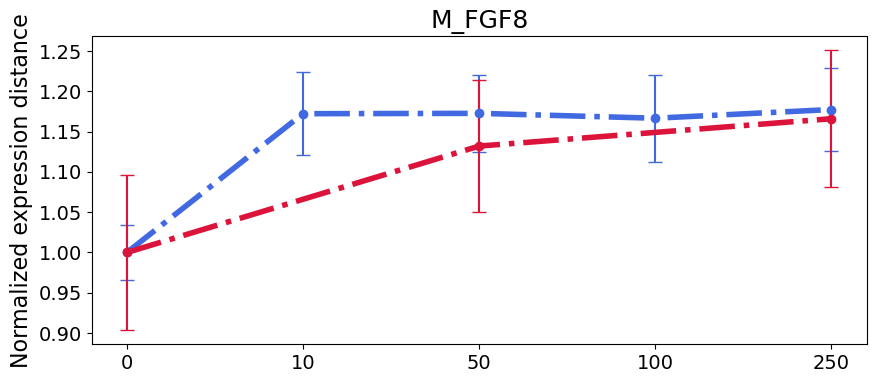

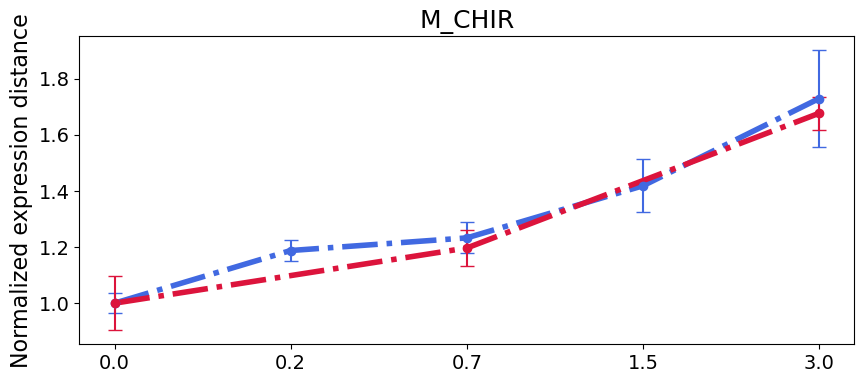

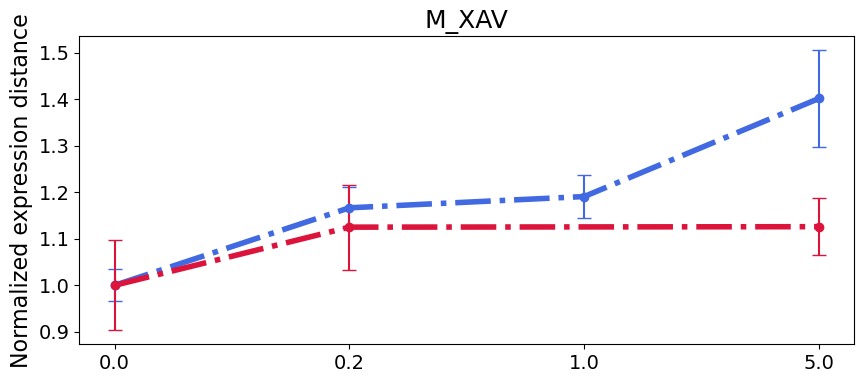

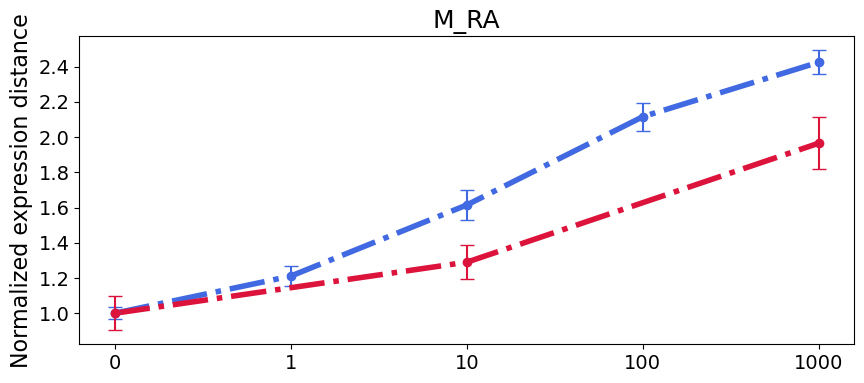

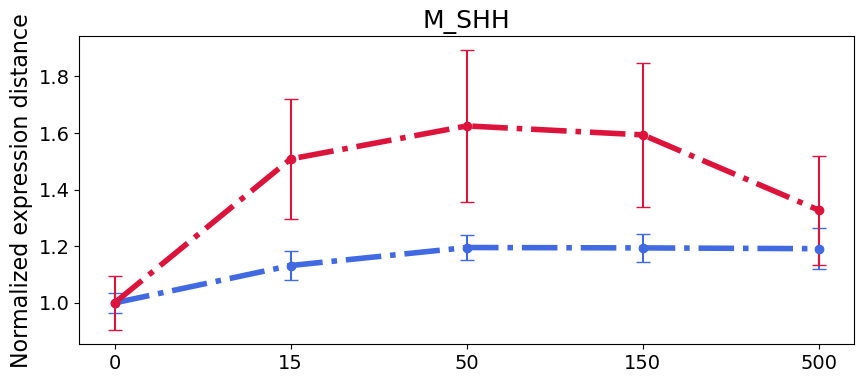

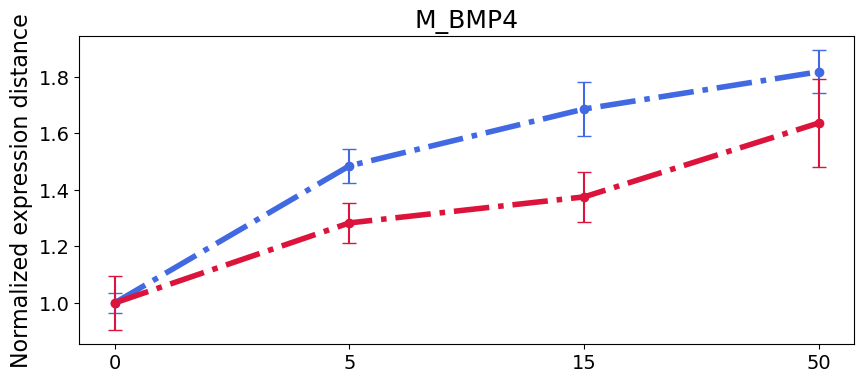

In [312]:
morphogens = ['FGF8','CHIR','XAV','RA','SHH','BMP4']
for morph in morphogens:
    meta_all_plot = meta_all.loc[meta_all['sample'].isin(['iGlut_post','iGABA_post'])].copy()

    morph_conditions = [x for x in list(set(meta_all_plot['condition'])) if morph in x]
    morph_conditions = [x for x in morph_conditions if 'ctrl' in x]
    
    other_morphs = [x for x in morphogens if x!=morph]
    for o_morph in other_morphs:
        morph_conditions = [x for x in morph_conditions if not o_morph in x]

    morph_conditions.append('ctrl_ctrl')

    meta_all_plot = meta_all_plot.loc[meta_all_plot['condition'].isin(morph_conditions)]
    morph = 'M_'+morph

    
    morph_concs = list(set(meta_all_plot[morph]))
    morph_concs = sorted(morph_concs)
    
    
    meta_all_plot['q_morph'] = 0
    q_count = 0
    for morph_c in morph_concs:
        meta_all_plot.loc[meta_all_plot[morph]==morph_c,'q_morph'] = q_count
        q_count+=1
    
    
    
    plt.figure(figsize=(10,4))
    meta_all_plot_sample = meta_all_plot.loc[meta_all_plot['sample']=='iGlut_post'].copy()
    meta_all_plot_sample_mean = meta_all_plot_sample.groupby('q_morph').mean(numeric_only=True).copy()
    x,y = meta_all_plot_sample_mean.index, meta_all_plot_sample_mean['mdist']
    y = y/y[0]
    meta_all_plot_sample['mdist_norm'] = meta_all_plot_sample['mdist']/y[0]
    y_err = np.array(meta_all_plot_sample.groupby('q_morph').std(numeric_only=True)['mdist_norm'])
    y_size = np.array(np.sqrt(meta_all_plot_sample.groupby('q_morph').size()))
    y_sem = y_err/y_size
    plt.plot(x,y,'-.',c='royalblue',linewidth=4,markersize=4)
    plt.errorbar(x, y, yerr=y_sem, fmt='o', c='royalblue',capsize=5, label='Standard Deviation')

    
    
    meta_all_plot_sample = meta_all_plot.loc[meta_all_plot['sample']=='iGABA_post'].copy()
    meta_all_plot_sample_mean = meta_all_plot_sample.groupby('q_morph').mean(numeric_only=True).copy()
    x,y = meta_all_plot_sample_mean.index, meta_all_plot_sample_mean['mdist']
    y = y/y[0]
    meta_all_plot_sample['mdist_norm'] = meta_all_plot_sample['mdist']/y[0]
    y_err = np.array(meta_all_plot_sample.groupby('q_morph').std(numeric_only=True)['mdist_norm'])
    y_size = np.array(np.sqrt(meta_all_plot_sample.groupby('q_morph').size()))
    y_sem = y_err/y_size

    plt.plot(x,y,'-.',c='crimson',linewidth=4,markersize=4)
    plt.errorbar(x, y, yerr=y_sem, fmt='o', c='crimson',capsize=5, label='Standard Deviation')
    #plt.xscale('log')
    
    plt.xticks(ticks=list(set(meta_all_plot['q_morph'])),labels=morph_concs)
    plt.ylabel('Normalized expression distance',fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title(morph,fontsize=18)
    plt.savefig("figures/distance/euclid_distance_"+morph+"_post_samples.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/distance/euclid_distance_"+morph+"_post_samples.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

    plt.show()
    plt.close()

In [314]:
meta_all_plot = meta_all.loc[meta_all['sample'].isin(['iGlut_pre','iGABA_pre'])].copy()


In [340]:
meta_all_plot_glutpre = meta_all.loc[meta_all['sample']=='iGlut_pre']
meta_all_plot_gabapre = meta_all.loc[meta_all['sample']=='iGABA_pre']

In [341]:
glut_pre_conditions = list(set(meta_all_plot_glutpre['condition_BM']))
gaba_pre_conditions = list(set(meta_all_plot_gabapre['condition_BM']))

In [342]:
print(len(glut_pre_conditions))
print(len(gaba_pre_conditions))

96
95


In [347]:
[x for x in glut_pre_conditions if x not in gaba_pre_conditions]

['XAV_3_FGF8_CycA_NIM']

In [336]:
meta_all_plot_glutpre = meta_all.loc[meta_all['sample']=='iGlut_post']
meta_all_plot_gabapre = meta_all.loc[meta_all['sample']=='iGABA_post']

In [337]:
glut_pre_conditions = list(set(meta_all_plot_glutpre['condition_BM']))
gaba_pre_conditions = list(set(meta_all_plot_gabapre['condition_BM']))

In [338]:
print(len(glut_pre_conditions))
print(len(gaba_pre_conditions))

192
96


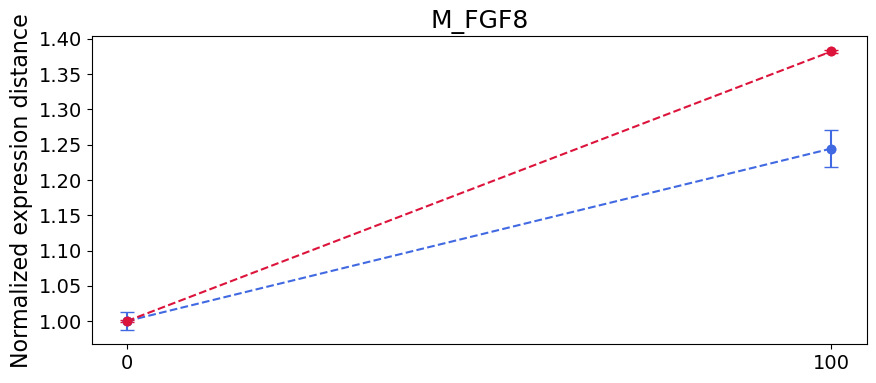

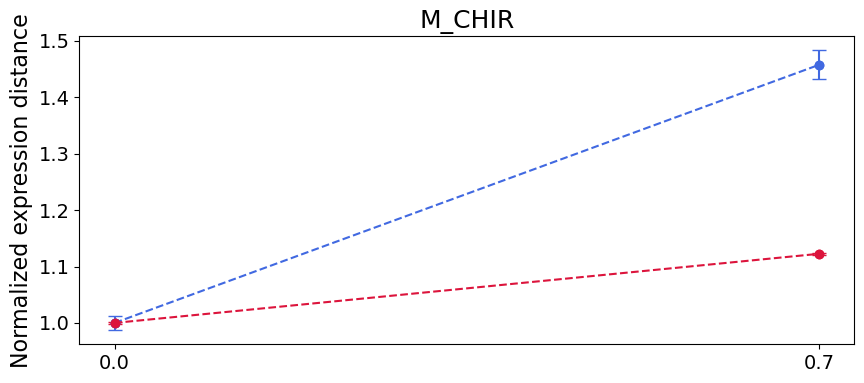

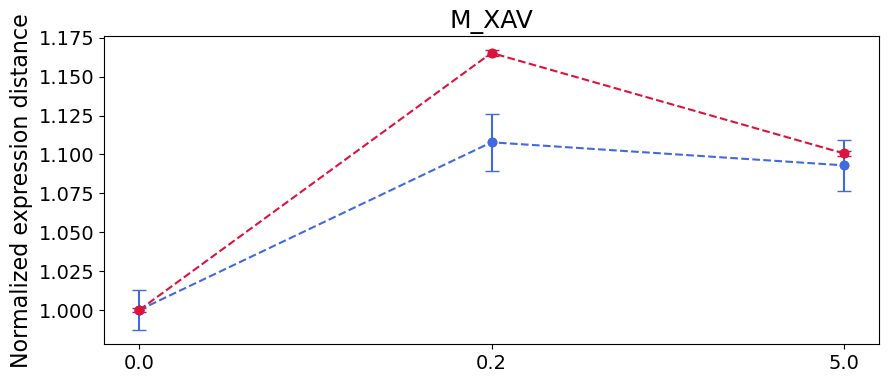

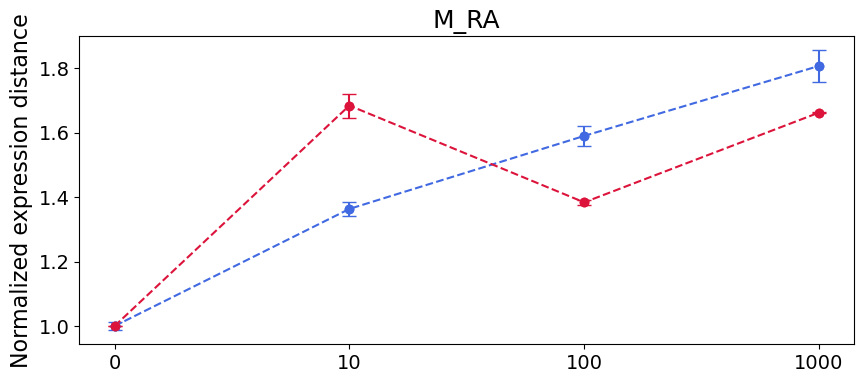

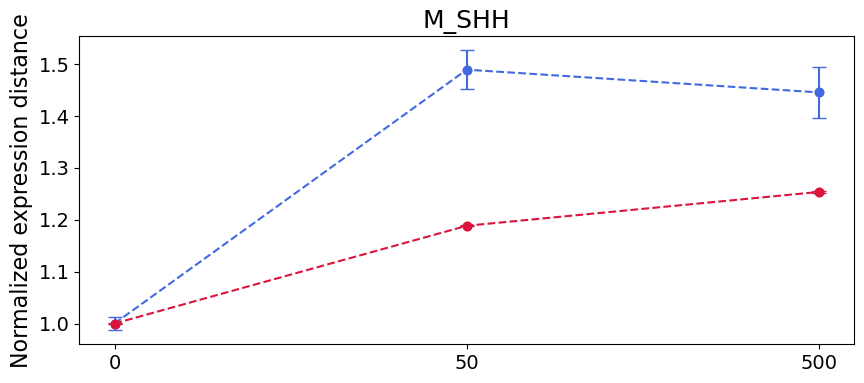

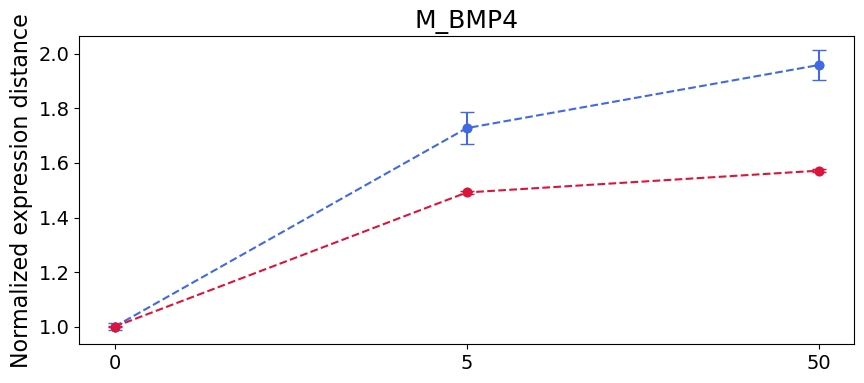

In [279]:
morphogens = ['FGF8','CHIR','XAV','RA','SHH','BMP4']
for morph in morphogens:
    meta_all_plot = meta_all.loc[meta_all['sample'].isin(['iGlut_pre','iGABA_pre'])].copy()

    morph_conditions = [x for x in list(set(meta_all_plot['condition'])) if morph in x]
    morph_conditions = [x for x in morph_conditions if 'ctrl' in x]
    
    other_morphs = [x for x in morphogens if x!=morph]
    for o_morph in other_morphs:
        morph_conditions = [x for x in morph_conditions if not o_morph in x]

    morph_conditions.append('ctrl_ctrl')

    meta_all_plot = meta_all_plot.loc[meta_all_plot['condition'].isin(morph_conditions)]
    morph = 'M_'+morph

    
    morph_concs = list(set(meta_all_plot[morph]))
    morph_concs = sorted(morph_concs)
    
    
    meta_all_plot['q_morph'] = 0
    q_count = 0
    for morph_c in morph_concs:
        meta_all_plot.loc[meta_all_plot[morph]==morph_c,'q_morph'] = q_count
        q_count+=1
    
    
    
    plt.figure(figsize=(10,4))
    meta_all_plot_sample = meta_all_plot.loc[meta_all_plot['sample']=='iGlut_pre'].copy()
    meta_all_plot_sample_mean = meta_all_plot_sample.groupby('q_morph').median(numeric_only=True).copy()
    x,y = meta_all_plot_sample_mean.index, meta_all_plot_sample_mean['mdist']
    y = y/y[0]
    meta_all_plot_sample['mdist_norm'] = meta_all_plot_sample['mdist']/y[0]
    y_err = np.array(meta_all_plot_sample.groupby('q_morph').std(numeric_only=True)['mdist_norm'])
    y_size = np.array(np.sqrt(meta_all_plot_sample.groupby('q_morph').size()))
    y_sem = y_err/y_size
    plt.plot(x,y,'o--',c='royalblue')
    plt.errorbar(x, y, yerr=y_sem, fmt='o', c='royalblue',capsize=5, label='Standard Deviation')

    
    
    meta_all_plot_sample = meta_all_plot.loc[meta_all_plot['sample']=='iGABA_pre'].copy()
    meta_all_plot_sample_mean = meta_all_plot_sample.groupby('q_morph').median(numeric_only=True).copy()
    x,y = meta_all_plot_sample_mean.index, meta_all_plot_sample_mean['mdist']
    y = y/y[0]
    meta_all_plot_sample['mdist_norm'] = meta_all_plot_sample['mdist']/y[0]
    y_err = np.array(meta_all_plot_sample.groupby('q_morph').std(numeric_only=True)['mdist_norm'])
    y_size = np.array(np.sqrt(meta_all_plot_sample.groupby('q_morph').size()))
    y_sem = y_err/y_size

    plt.plot(x,y,'o--',c='crimson')
    plt.errorbar(x, y, yerr=y_sem, fmt='o', c='crimson',capsize=5, label='Standard Deviation')
    #plt.xscale('log')
    
    plt.xticks(ticks=list(set(meta_all_plot['q_morph'])),labels=morph_concs)
    plt.ylabel('Normalized expression distance',fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title(morph,fontsize=18)
    plt.savefig("figures/distance/euclid_distance_"+morph+"_pre_samples.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/distance/euclid_distance_"+morph+"_pre_samples.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

    plt.show()
    plt.close()

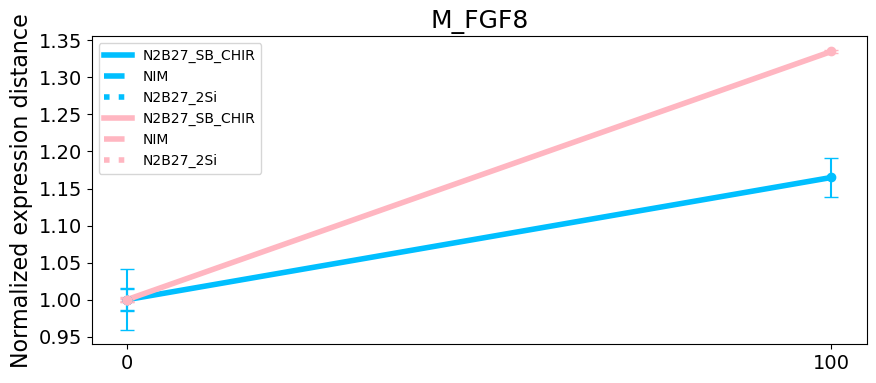

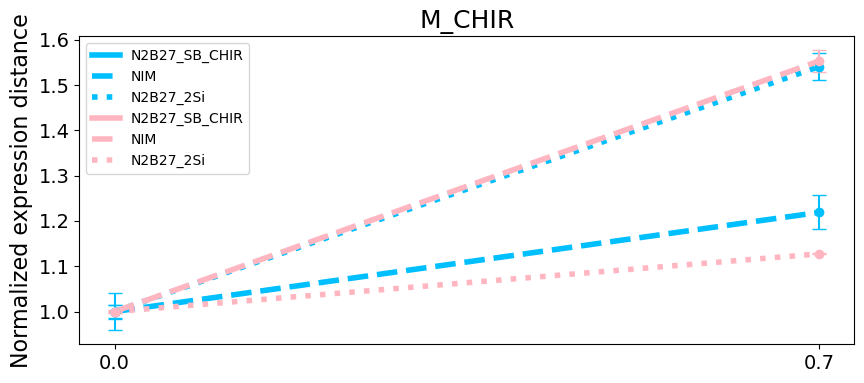

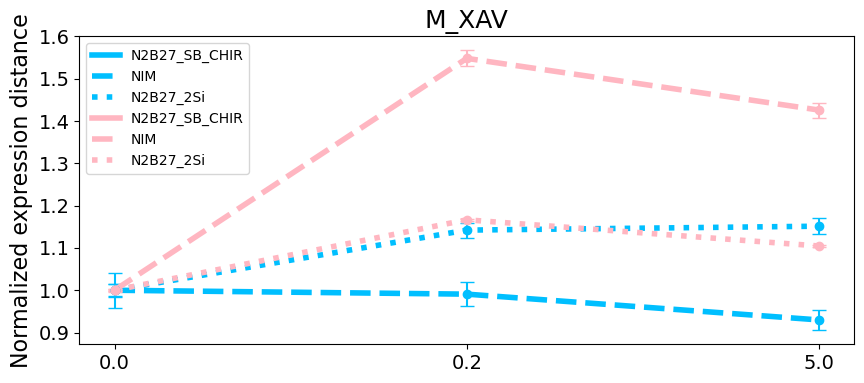

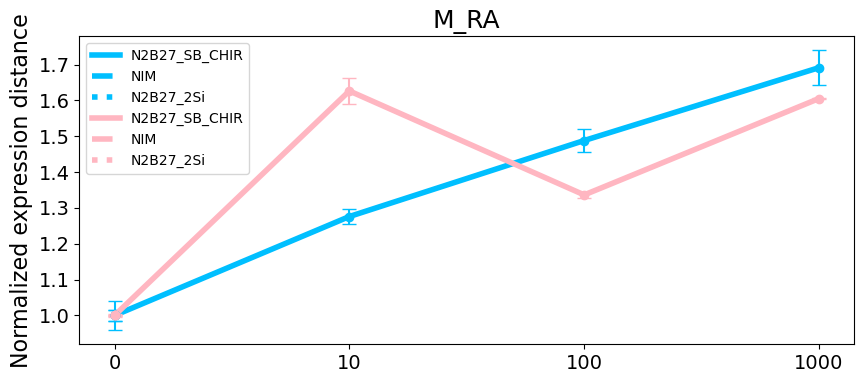

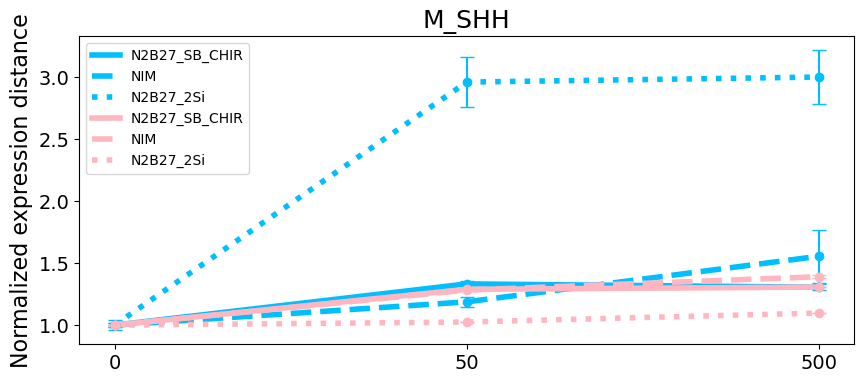

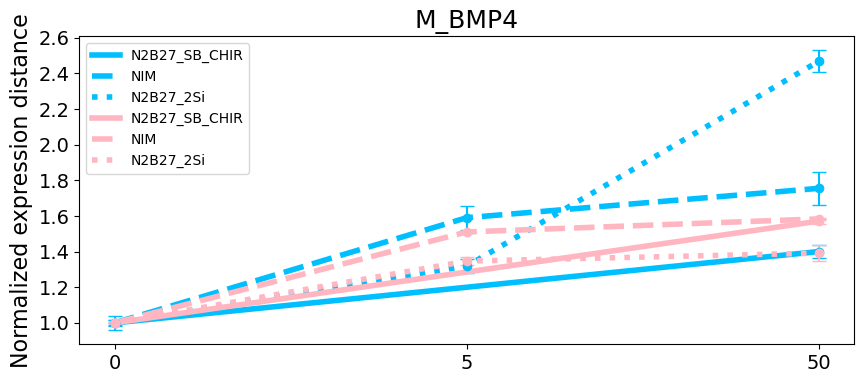

In [313]:
morphogens = ['FGF8','CHIR','XAV','RA','SHH','BMP4']
for morph in morphogens:
    meta_all_plot = meta_all.loc[meta_all['sample'].isin(['iGlut_pre','iGABA_pre'])].copy()

    morph_conditions = [x for x in list(set(meta_all_plot['condition'])) if morph in x]
    morph_conditions = [x for x in morph_conditions if 'ctrl' in x]
    
    other_morphs = [x for x in morphogens if x!=morph]
    for o_morph in other_morphs:
        morph_conditions = [x for x in morph_conditions if not o_morph in x]

    morph_conditions.append('ctrl_ctrl')

    meta_all_plot = meta_all_plot.loc[meta_all_plot['condition'].isin(morph_conditions)]
    morph = 'M_'+morph

    
    morph_concs = list(set(meta_all_plot[morph]))
    morph_concs = sorted(morph_concs)
    
    
    meta_all_plot['q_morph'] = 0
    q_count = 0
    for morph_c in morph_concs:
        meta_all_plot.loc[meta_all_plot[morph]==morph_c,'q_morph'] = q_count
        q_count+=1
    
    
    
    plt.figure(figsize=(10,4))
    
    for sample,sample_color in zip(['iGlut_pre','iGABA_pre'],['deepskyblue','lightpink']):
        meta_all_plot_sample = meta_all_plot.loc[meta_all_plot['sample']==sample].copy()

        BMs = list(set(meta_all_plot_sample['Basal_media']))
        BM_lstyle = ['-','--',':'][0:len(BMs)]
        for BM,lstyle in zip(BMs,BM_lstyle):
            meta_all_plot_sample_BM = meta_all_plot_sample.loc[meta_all_plot_sample['Basal_media']==BM].copy()
            meta_all_plot_sample_mean = meta_all_plot_sample_BM.groupby('q_morph').median(numeric_only=True).copy()
            x,y = meta_all_plot_sample_mean.index, meta_all_plot_sample_mean['mdist']
            y = y/y[0]
            meta_all_plot_sample_BM['mdist_norm'] = meta_all_plot_sample_BM['mdist']/y[0]
            y_err = np.array(meta_all_plot_sample_BM.groupby('q_morph').std(numeric_only=True)['mdist_norm'])
            y_size = np.array(np.sqrt(meta_all_plot_sample_BM.groupby('q_morph').size()))
            y_sem = y_err/y_size
            plt.plot(x,y,lstyle,c=sample_color,label=BM,linewidth=4,markersize=4)

            plt.errorbar(x, y, yerr=y_sem, fmt='o', c=sample_color,capsize=5)
    
    plt.legend()
    plt.xticks(ticks=list(set(meta_all_plot['q_morph'])),labels=morph_concs)
    plt.ylabel('Normalized expression distance',fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title(morph,fontsize=18)
    plt.savefig("figures/distance/euclid_distance_"+morph+"_pre_samples_splitBM.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/distance/euclid_distance_"+morph+"_pre_samples_splitBM.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

    plt.show()
    plt.close()

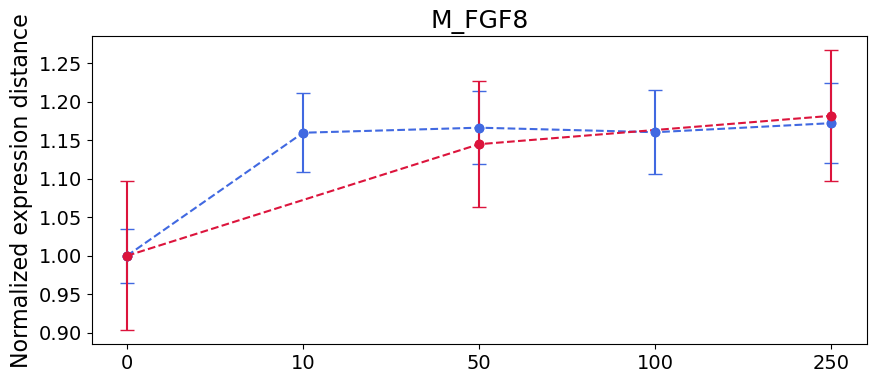

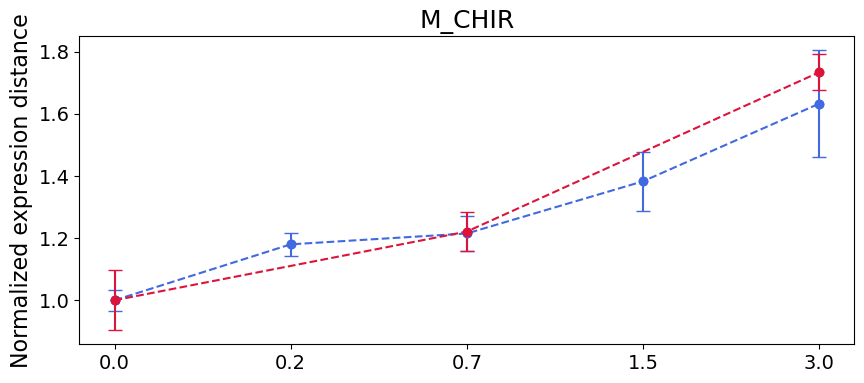

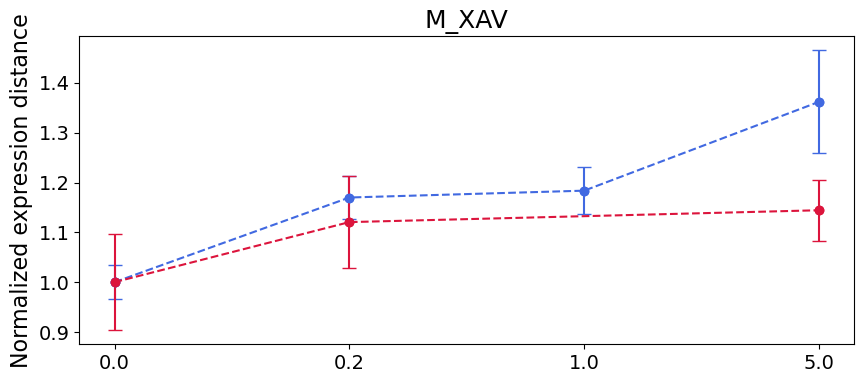

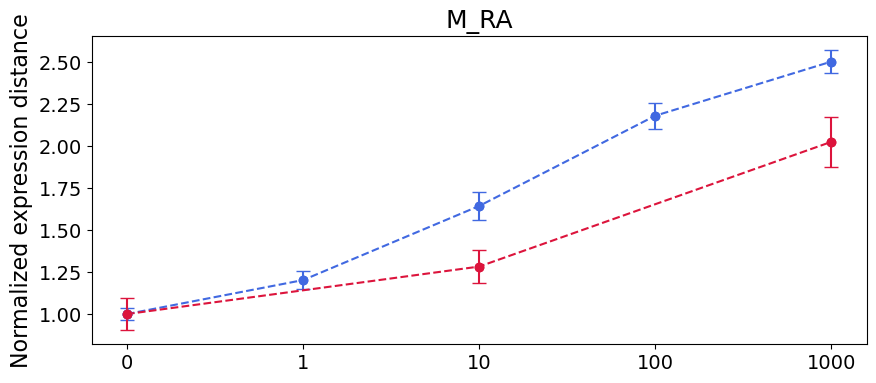

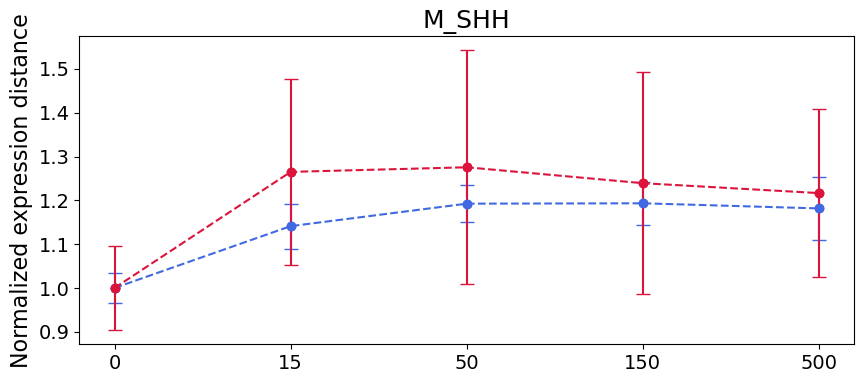

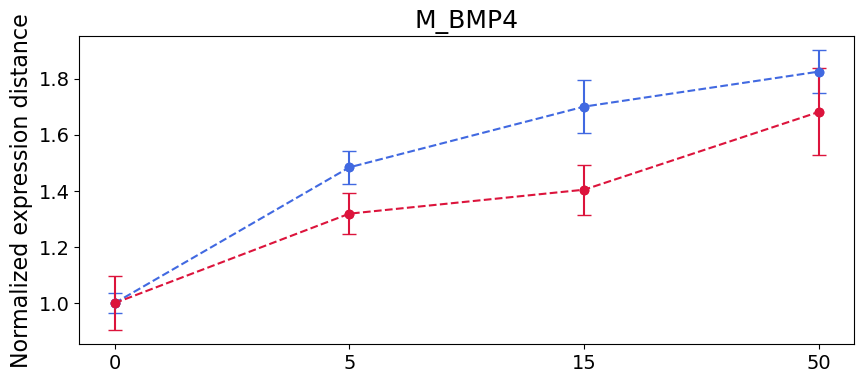

In [288]:
morphogens = ['FGF8','CHIR','XAV','RA','SHH','BMP4']
for morph in morphogens:
    meta_all_plot = meta_all.loc[meta_all['sample'].isin(['iGlut_post','iGABA_post'])].copy()

    morph_conditions = [x for x in list(set(meta_all_plot['condition'])) if morph in x]
    morph_conditions = [x for x in morph_conditions if 'ctrl' in x]
    
    other_morphs = [x for x in morphogens if x!=morph]
    for o_morph in other_morphs:
        morph_conditions = [x for x in morph_conditions if not o_morph in x]

    morph_conditions.append('ctrl_ctrl')

    meta_all_plot = meta_all_plot.loc[meta_all_plot['condition'].isin(morph_conditions)]
    morph = 'M_'+morph

    
    morph_concs = list(set(meta_all_plot[morph]))
    morph_concs = sorted(morph_concs)
    
    
    meta_all_plot['q_morph'] = 0
    q_count = 0
    for morph_c in morph_concs:
        meta_all_plot.loc[meta_all_plot[morph]==morph_c,'q_morph'] = q_count
        q_count+=1
    
    
    
    plt.figure(figsize=(10,4))
    
    for sample,sample_color in zip(['iGlut_post','iGABA_post'],['royalblue','crimson']):
        meta_all_plot_sample = meta_all_plot.loc[meta_all_plot['sample']==sample].copy()

        BMs = list(set(meta_all_plot_sample['Basal_media']))
        for BM in BMs:
            meta_all_plot_sample_BM = meta_all_plot_sample.loc[meta_all_plot_sample['Basal_media']==BM].copy()
            meta_all_plot_sample_mean = meta_all_plot_sample_BM.groupby('q_morph').median(numeric_only=True).copy()
            x,y = meta_all_plot_sample_mean.index, meta_all_plot_sample_mean['mdist']
            y = y/y[0]
            meta_all_plot_sample_BM['mdist_norm'] = meta_all_plot_sample_BM['mdist']/y[0]
            y_err = np.array(meta_all_plot_sample_BM.groupby('q_morph').std(numeric_only=True)['mdist_norm'])
            y_size = np.array(np.sqrt(meta_all_plot_sample_BM.groupby('q_morph').size()))
            y_sem = y_err/y_size
            plt.plot(x,y,'o--',c=sample_color)
            plt.errorbar(x, y, yerr=y_sem, fmt='o', c=sample_color,capsize=5, label='Standard Deviation')
    
    plt.xticks(ticks=list(set(meta_all_plot['q_morph'])),labels=morph_concs)
    plt.ylabel('Normalized expression distance',fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title(morph,fontsize=18)
    plt.savefig("figures/distance/euclid_distance_"+morph+"_pre_samples_splitBM.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/distance/euclid_distance_"+morph+"_pre_samples_splitBM.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

    plt.show()
    plt.close()